In [1]:
import pandas as pd
import numpy as np
import os

# Pandas Useful Codes

In [178]:
x = pd.date_range(start='2020/01/01', end='2020/12/31', freq='D', closed='right')
# y = np.random.randint(0, 100, 365)
num_arr = np.random.randn(365, 1)
df = pd.DataFrame(data=num_arr, index=x, columns=['random_num'])
df.head()

,random_num
2020-01-02,1.198791
2020-01-03,1.453684
2020-01-04,-0.304207
2020-01-05,-0.613725
2020-01-06,-2.552214


In [180]:
print(df.info(), '\n'*2, df.describe(), '\n'*2, df.dtypes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2020-01-02 to 2020-12-31
Freq: D
Data columns (total 1 columns):
random_num    365 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB
None 

        random_num
count  365.000000
mean    -0.053341
std      0.935370
min     -2.863017
25%     -0.646241
50%     -0.052124
75%      0.521066
max      2.954207 

 random_num    float64
dtype: object


In [2]:
# sample data
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

In [32]:
df.head()

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


In [3]:
# this code is much faster than find uniques and loop them
for i in df.groupby('priority'):
    print(type(i))
    print(i[0])
    print(i[1])

<class 'tuple'>
no
  animal  age  visits priority
c  snake  0.5       2       no
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
i    dog  7.0       2       no
j    dog  3.0       1       no
<class 'tuple'>
yes
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
d    dog  NaN       3      yes
h    cat  NaN       1      yes


In [43]:
[i for i in df.animal.value_counts().nlargest(2).items()]

[('dog', 4), ('cat', 4)]

In [44]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [45]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
# df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


In [48]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


In [52]:
df1 = df.drop_duplicates(subset='visits')
df1

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False


In [78]:
df
# df1 = df.sub(df.mean(axis=1), axis=0)
df.fillna(0, inplace=True)
df_tmp = df[['age', 'visits']]
df_tmp.sub(df_tmp.mean(axis='columns'), axis='rows')

,age,visits
a,0.75,-0.75
b,0.00,0.00
c,-0.75,0.75
d,-1.50,1.50
e,1.50,-1.50
f,-0.50,0.50
g,1.75,-1.75
h,-0.50,0.50
i,2.50,-2.50
j,1.00,-1.00


In [95]:
np.random.seed(2021)
df = pd.DataFrame(np.random.random(size=(5, 5)), columns=list('abcde'))
# df.sum().idxmin()
df.sum().nsmallest(1).index[0]

'b'

In [103]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df

,A,B
0,a,12
1,a,345
2,a,3
3,b,1
4,b,45
5,c,14
6,a,4
7,a,52
8,b,54
9,c,23


In [113]:
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
df1

A
a    409
b    156
c    345
Name: B, dtype: int64

In [114]:
df = pd.DataFrame({'A': [1,2,11,11,33,34,35,40,79,99], 
                   'B': [1,2,11,11,33,34,35,40,79,99]})
df1 = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()
df1

    A   B
0   1   1
1   2   2
2  11  11
3  11  11
4  33  33
5  34  34
6  35  35
7  40  40
8  79  79
9  99  99


A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64

In [117]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # 标记0的位置
# idx = np.arange(len(df))
# df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
print(izero)

# 方法二
# x = (df['X'] != 0).cumsum()
# y = x != x.shift()
# df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()

# 方法三
# df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
#first_zero_idx = (df['X'] == 0).idxmax()
# df['Y'].iloc[0:first_zero_idx] += 1

[-1  2  7]


In [4]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.unstack().sort_values()[-3:].index.tolist()

          0         1         2
0  0.475334  0.116028  0.765768
1  0.361465  0.506624  0.047436
2  0.488139  0.305831  0.600415
3  0.522896  0.255578  0.167828
4  0.611065  0.955403  0.068023


[(0, 4), (2, 0), (1, 4)]

In [5]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [-12,345,3,1,45,14,4,-52,54,23,-235,21,57,3,87]})
print(df)

def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)

   grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87
   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


In [6]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
print(df)

g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value'] 

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()

s.reset_index(level=0, drop=True).sort_index() 

   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

In [8]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

s[s.index.weekday == 2].sum() 

s.resample('M').mean()

s.groupby(pd.Grouper(freq='4M')).idxmax()

pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

In [32]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

print(df.head())

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df = df.join(temp)
df = df.drop('From_To', axis=1)

df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()

df['Airline'] = df['Airline'].str.extract('([0-9a-zA-Z\s]+)', expand=False).str.strip()

delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"


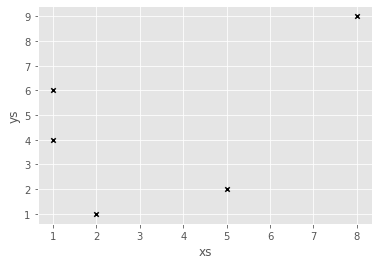

In [14]:
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.style.use('ggplot')
df.plot.scatter("xs", "ys", color = "black", marker = "x")

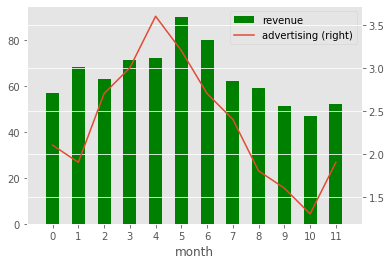

In [16]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12));

In [25]:
import pandas as pd  
p1 = pd.Series([2, 4, 6, 8, 10])
p2 = pd.Series([8, 10, 12, 14, 16])
p1[~p1.isin(p2)]

0    2
1    4
2    6
dtype: int64

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# real-life sample

In [1]:
import pandas as pd
path = 'E:/Term3 Courses/Visual Analytics & Applications/Session1/'
df = pd.read_excel(path + 'Sample - Superstore.xls')

In [2]:
#找前三名土豪客户
# df.groupby('Customer Name')['Profit'].sum().to_frame().sort_values(by='Profit')[-3:].index.to_list()
df.groupby('Customer Name')['Profit'].sum().nlargest(3).index.tolist()

['Tamara Chand', 'Raymond Buch', 'Sanjit Chand']

In [23]:
[i[0][0] for i in df.groupby(['Region', 'Order Date'])['Row ID'].count().nlargest(1).items() ]

['West']

In [5]:
df['Order Date'].unique()

array(['2017-11-08T00:00:00.000000000', '2017-06-12T00:00:00.000000000',
       '2016-10-11T00:00:00.000000000', ...,
       '2017-06-03T00:00:00.000000000', '2016-04-12T00:00:00.000000000',
       '2015-01-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [59]:
#找有最多个unique city的交易日
# df.groupby('Order Date').agg({'City':lambda x: x.nunique()}).sort_values(by='City')[-3:].index.to_list()
df.groupby('Order Date').agg({'City': lambda x: x.nunique()}).nlargest(3, 'City').index.astype('str').tolist()

['2018-12-02', '2017-09-05', '2018-09-04']

In [184]:
df_agg = df.groupby('Order Date').agg({
    'City': [lambda x: x.nunique(), 'max'],
    'Order ID': 'count',
    'Sales': ['min', 'max'],
})
df_agg.head()

City               Order ID   Sales          
           <lambda>           max    count     min       max
Order Date                                                  
2015-01-03        1       Houston        1  16.448    16.448
2015-01-04        1    Naperville        3   3.540   272.736
2015-01-05        1  Philadelphia        1  19.536    19.536
2015-01-06        3   Los Angeles        9   5.480  2573.820
2015-01-07        1    Huntsville        2  10.430    76.728

In [185]:
df_agg.columns = df_agg.columns.to_flat_index()
df_agg.head()

,"(City, <lambda>)","(City, max)","(Order ID, count)","(Sales, min)","(Sales, max)"
Order Date,,,,,
2015-01-03,1,Houston,1,16.448,16.448
2015-01-04,1,Naperville,3,3.540,272.736
2015-01-05,1,Philadelphia,1,19.536,19.536
2015-01-06,3,Los Angeles,9,5.480,2573.820
2015-01-07,1,Huntsville,2,10.430,76.728


In [106]:
df_agg.columns = [e[0] + '_' + e[1] for e in df_agg.columns.tolist()]

In [112]:
df_agg.rename({
    "City_<lambda>": 'unique_cities',
}, axis=1, inplace=True)
df_agg.head()

,unique_cities,City_max,Order ID_count,Sales_min,Sales_max
Order Date,,,,,
2015-01-03,1,Houston,1,16.448,16.448
2015-01-04,1,Naperville,3,3.540,272.736
2015-01-05,1,Philadelphia,1,19.536,19.536
2015-01-06,3,Los Angeles,9,5.480,2573.820
2015-01-07,1,Huntsville,2,10.430,76.728


In [188]:
#最多交易条目
df.groupby('Region')['Category'].value_counts().to_frame().nlargest(3, 'Category')

,,Category
Region,Category,
West,Office Supplies,1897
East,Office Supplies,1712
Central,Office Supplies,1422


In [130]:
df.set_index('Order ID', inplace=True)

In [137]:
df.sort_values(by=['Quantity', 'Sales', ], ascending=[False, True]).reset_index()

,Order ID,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-151750,8075,2018-01-01,2018-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340.0,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.80,-22.6842
1,US-2018-155425,1364,2018-11-10,2018-11-11,First Class,AB-10600,Ann Blume,Corporate,United States,Tucson,...,85705.0,West,OFF-BI-10001036,Office Supplies,Binders,Cardinal EasyOpen D-Ring Binders,38.388,14,0.70,-25.5920
2,CA-2015-115259,114,2015-08-25,2015-08-27,Second Class,RC-19960,Ryan Crowe,Consumer,United States,Columbus,...,43229.0,East,OFF-FA-10000621,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",40.096,14,0.20,14.5348
3,CA-2017-145583,140,2017-10-13,2017-10-19,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Roseville,...,95661.0,West,FUR-FU-10001706,Furniture,Furnishings,Longer-Life Soft White Bulbs,43.120,14,0.00,20.6976
4,CA-2017-142405,5669,2017-06-11,2017-06-15,Standard Class,SE-20110,Sanjit Engle,Consumer,United States,Seattle,...,98103.0,West,OFF-BI-10004728,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,53.984,14,0.20,17.5448
5,CA-2015-154165,9516,2015-02-17,2015-02-24,Standard Class,DL-13315,Delfina Latchford,Consumer,United States,Chicago,...,60653.0,Central,OFF-AR-10003631,Office Supplies,Art,Staples in misc. colors,54.208,14,0.20,8.8088
6,CA-2017-141887,8522,2017-01-11,2017-01-15,Standard Class,MP-17470,Mark Packer,Home Office,United States,Columbus,...,43229.0,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,54.992,14,0.20,8.9362
7,CA-2018-169859,2948,2018-12-14,2018-12-18,Standard Class,MP-18175,Mike Pelletier,Home Office,United States,San Diego,...,92024.0,West,OFF-BI-10000174,Office Supplies,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,64.960,14,0.20,22.7360
8,CA-2015-158337,3442,2015-03-11,2015-03-14,Second Class,KA-16525,Kelly Andreada,Consumer,United States,New York City,...,10024.0,East,OFF-PA-10002137,Office Supplies,Paper,"Southworth 100% Résumé Paper, 24lb.",108.920,14,0.00,49.0140
9,CA-2016-149713,576,2016-09-18,2016-09-22,Second Class,TG-21640,Trudy Glocke,Consumer,United States,Long Beach,...,90805.0,West,OFF-PA-10004530,Office Supplies,Paper,Personal Creations Ink Jet Cards and Labels,160.720,14,0.00,78.7528


In [145]:
tmp = pd.pivot_table(
    df,
    values='Sales',
    index='Region',
    columns='Category',
    aggfunc='count',
    fill_value=0,
    margins=False,
    dropna=True,
    margins_name='All',
)
tmp

Category,Furniture,Office Supplies,Technology
Region,,,
Central,481,1422,420
East,601,1712,535
South,332,995,293
West,707,1897,599


In [147]:
tmp.sort_values(by='South', axis=1)

Category,Technology,Furniture,Office Supplies
Region,,,
Central,420,481,1422
East,535,601,1712
South,293,332,995
West,599,707,1897


In [191]:
df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Customer Name': 'max',
}).nlargest(3, 'Sales')['Customer Name'].tolist()

['Sean Miller', 'Tamara Chand', 'Raymond Buch']

In [ ]:
#save file
path = 'E:/xxxx/xxx/'
writer = pd.ExcelWriter(path+'xxx.xlsx')
df.to_excel(writer, sheet_name='xxx')
writer.save()